In [1]:
# Import the required libraries and read the data sets
import pandas as pd
data = pd.read_csv("/Users/zhaozihao/Desktop/Dataset_book/Train_new.csv")

In [2]:
# Feature selection, specific reasons for the selection in the above section
feature = data[["num_pages","ratings_count","text_reviews_count","year"]]
target = data[["average_rating"]]

In [3]:
# Divide the training set and the test set
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(feature,target,test_size = 0.1)
Ytrain = Ytrain.values.ravel()

0.10106608380519687 44


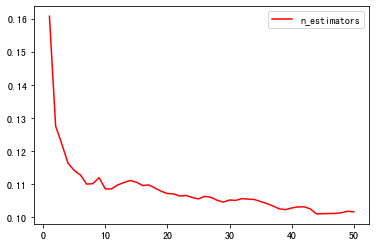

In [4]:
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
# Create an empty list to hold the MSE under different n_estimators
test = []
for i in range(50):
    regr = RandomForestRegressor(n_estimators=i+1,random_state=0)
    regr = regr.fit(Xtrain,Ytrain)
    predict_y=regr.predict(Xtest)
    mse = metrics.mean_squared_error(predict_y,Ytest)
    test.append(mse)  
print(min(test),test.index(min(test))+1)
plt.plot(range(1,51),test,color='red',label='n_estimators')
plt.legend()
plt.show()

0.08721377023062983 2


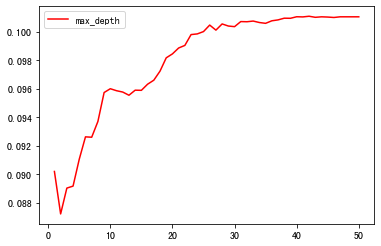

In [5]:
# Create an empty list to hold the MSE under different max_depth
test = []
for i in range(50):
    regr = RandomForestRegressor(max_depth=i+1,n_estimators=44,random_state=0)
    regr = regr.fit(Xtrain,Ytrain)
    predict_y=regr.predict(Xtest)
    mse = metrics.mean_squared_error(predict_y,Ytest)
    test.append(mse)  
print(min(test),test.index(min(test))+1)
plt.plot(range(1,51),test,color='red',label='max_depth')
plt.legend()
plt.show()

0.08692923762714669 9


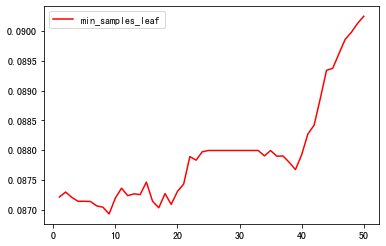

In [6]:
# Create an empty list to hold the MSE under different min_samples_leaf
test = []
for i in range(50):
    regr = RandomForestRegressor(min_samples_leaf=i+1,max_depth=2,n_estimators=44,random_state=0)
    regr = regr.fit(Xtrain,Ytrain)
    predict_y=regr.predict(Xtest)
    mse = metrics.mean_squared_error(predict_y,Ytest)
    test.append(mse)  
print(min(test),test.index(min(test))+1)
plt.plot(range(1,51),test,color='red',label='min_samples_leaf')
plt.legend()
plt.show()

0.08484079259418077 2


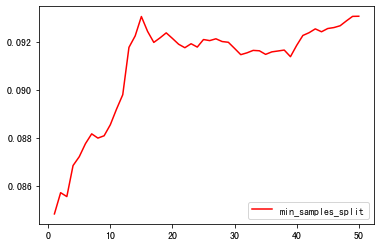

In [8]:
# Create an empty list to hold the MSE under different min_samples_split
test = []
for i in range(50):
    regr = RandomForestRegressor(min_samples_split=i+2,min_samples_leaf=9,max_depth=2,n_estimators=44,random_state=0)
    regr = regr.fit(Xtrain,Ytrain)
    predict_y=regr.predict(Xtest)
    mse = metrics.mean_squared_error(predict_y,Ytest)
    test.append(mse)  
print(min(test),test.index(min(test))+2)
plt.plot(range(1,51),test,color='red',label='min_samples_split')
plt.legend()
plt.show()

In [ ]:
# For each training,we have different parameter setting in order to optimize the model
# So the analysis process in the report is different from this result